In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
dataset = pd.read_csv('../MELBOURNE_housing_FULL.csv')

In [127]:
print (dataset.shape)

dataset.head()

""" Suburb: Suburb
Address: Address
Rooms: Number of rooms
Price: Price in Australian dollars
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;
 SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; 
 SS - sold after auction price not disclosed. N/A - price or highest bid not available.
Type: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; 
    dev site - development site; o res - other residential.
SellerG: Real Estate Agent
Date: Date sold
Distance: Distance from CBD in Kilometres
Regionname: General Region (West, North West, North, North east ...etc)
Propertycount: Number of properties that exist in the suburb
Bedroom2 : Scraped # of Bedrooms (from different source)
Bathroom: Number of Bathrooms
Car: Number of carspots
Landsize: Land Size in Metres
BuildingArea: Building Size in Metres
YearBuilt: Year the house was built
CouncilArea: Governing council for the area
Lattitude: Self explanitory
Longtitude: Self explanitory """


(34857, 21)


' Suburb: Suburb\nAddress: Address\nRooms: Number of rooms\nPrice: Price in Australian dollars\nMethod: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;\n SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; \n SS - sold after auction price not disclosed. N/A - price or highest bid not available.\nType: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; \n    dev site - development site; o res - other residential.\nSellerG: Real Estate Agent\nDate: Date sold\nDistance: Distance from CBD in Kilometres\nRegionname: General Region (West, North West, North, North east ...etc)\nPropertycount: Number of properties that exist in the suburb\nBedroom2 : Scraped # of Bedrooms (from different source)\nBathroom: Number of Bathrooms\nCar: Number of carspots\nLandsize: Land Size in Metres\nBuildingArea: Building Size in Metres\nYearBuilt: Year the ho

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [129]:
# Find any duplicate rows 
dataset[dataset.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [130]:
# Remove duplicate rows
dataset.drop_duplicates(inplace=True)

In [131]:
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [132]:
dataset["Postcode"]

0        3067.0
1        3067.0
2        3067.0
3        3067.0
4        3067.0
          ...  
34852    3013.0
34853    3013.0
34854    3013.0
34855    3013.0
34856    3013.0
Name: Postcode, Length: 34856, dtype: float64

In [133]:
#Conver object columns into categorical/ date datatypes

obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname']

for a in obj_cats: 
    dataset[a] = dataset[a].astype('category')

dataset.info()



<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bedroom2       26639 non-null  float64 
 11  Bathroom       26630 non-null  float64 
 12  Car            26128 non-null  float64 
 13  Landsize       23046 non-null  float64 
 14  BuildingArea   13741 non-null  float64 
 15  YearBuilt      15550 non-null  float64 
 16  CouncilArea    34853 non-null  category
 17  Lattitude      26880 non-null  float

In [134]:
# Create an "Age" column to represent # years since the house was built

dataset["Age"] = 2024 - dataset["YearBuilt"]

In [135]:
#columns rooms and bedroom2 are the duplicates

dataset.drop("Bedroom2",axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bathroom       26630 non-null  float64 
 11  Car            26128 non-null  float64 
 12  Landsize       23046 non-null  float64 
 13  BuildingArea   13741 non-null  float64 
 14  YearBuilt      15550 non-null  float64 
 15  CouncilArea    34853 non-null  category
 16  Lattitude      26880 non-null  float64 
 17  Longtitude     26880 non-null  float

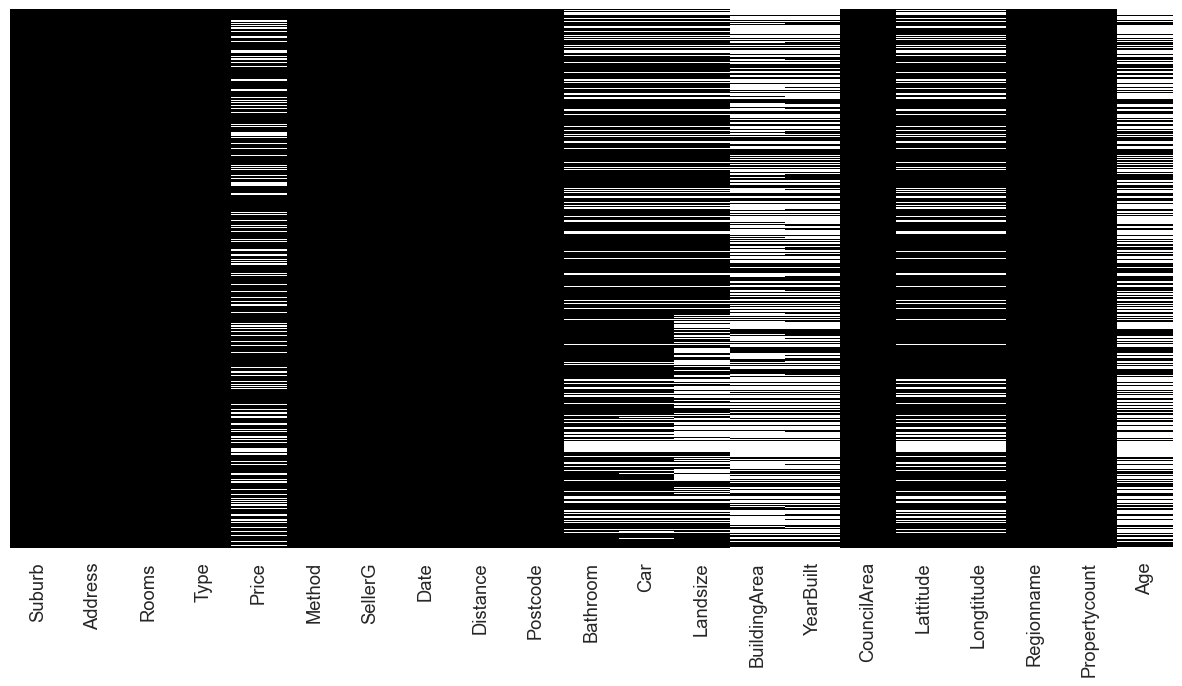

In [136]:
#Visualize missing values

plt.figure(figsize=(15, 7))
sns.set(font_scale=1.2)

# Generate the heatmap for missing values
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='Greys_r')

# Show the heatmap
plt.show()

In [137]:
# For each column, identify # of rows with missing values

dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
dtype: int64

In [138]:
#Percentage of missing values 

dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
Age              55.387882
dtype: float64

In [139]:
#Remove columns where >55% rows are missing values: BuildingArea, Year Built/ Age 

dataset.drop("BuildingArea",axis=1,inplace=True)
dataset.drop("YearBuilt",axis=1,inplace=True)
dataset.drop("Age",axis=1,inplace=True)

#Remove latitude and longitude given the location info is covered by Suburb, Regionname, and Distance
#dataset.drop("Lattitude",axis=1,inplace=True)
#dataset.drop("Longtitude",axis=1,inplace=True)

#Remove rows where price is missing values

dataset.dropna(axis=0, subset="Price", inplace=True)

dataset.info()
dataset.isnull().sum()/len(dataset)*100


<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  float64 
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  CouncilArea    27244 non-null  category
 14  Lattitude      20993 non-null  float64 
 15  Longtitude     20993 non-null  float64 
 16  Regionname     27244 non-null  category
 17  Propertycount  27244 non-null  float

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

In [140]:
dataset = dataset.dropna(subset=['Postcode'])
dataset['Postcode'] = dataset['Postcode'].astype(int).astype(str).str.zfill(5)

dataset["Postcode"]

1        03067
2        03067
4        03067
5        03067
6        03067
         ...  
34852    03013
34853    03013
34854    03013
34855    03013
34856    03013
Name: Postcode, Length: 27246, dtype: object

In [141]:
 #Lat & Long: Replace based on house addresses using Google's API
from geopy.geocoders import GoogleV3
from geopy.exc import GeocoderTimedOut

# Replace 'your_api_key' with your actual Google API key
geolocator = GoogleV3(api_key='your API')
for index, row in dataset.iterrows():
    if  (pd.isnull(row['Lattitude'])) or (pd.isnull(row['Longtitude'])):
        address = f"{row['Address']}, {row['Postcode']}"
        try:
            location = geolocator.geocode(address)
            if location:
                dataset.at[index, 'Lattitude'] = location.latitude
                dataset.at[index, 'Longtitude'] = location.longitude
        except GeocoderTimedOut:
            print ("timedout") 

GeocoderQueryError: The provided API key is invalid. 

In [ ]:
# Impute Landsize (medians grouped by Rooms and Type)
median_landsize = dataset.groupby(['Rooms', 'Type'])['Landsize'].median().reset_index()
median_landsize.columns = ['Rooms', 'Type', 'median_landsize']

dataset = dataset.merge(median_landsize, on=['Rooms', 'Type'], how='left')
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['median_landsize'])
dataset.drop(columns=['median_landsize'], inplace=True)

# Impute bathroom (medians grouped by Rooms)
median_bathroom = dataset.groupby(['Rooms'])['Bathroom'].median().reset_index()
median_bathroom.columns = ['Rooms', 'median_bathroom']

dataset = dataset.merge(median_bathroom, on=['Rooms'], how='left')
dataset['Bathroom'] = dataset['Bathroom'].fillna(dataset['median_bathroom'])
dataset.drop(columns=['median_bathroom'], inplace=True)

# Impute Car
dataset['Car'].fillna(dataset['Car'].median(),inplace=True)

# Impute Propertycount
dataset['Propertycount'].fillna(dataset['Propertycount'].median(),inplace=True)

dataset.isnull().sum()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27246 entries, 0 to 27245
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27246 non-null  category
 1   Address        27246 non-null  category
 2   Rooms          27246 non-null  int64   
 3   Type           27246 non-null  category
 4   Price          27246 non-null  float64 
 5   Method         27246 non-null  category
 6   SellerG        27246 non-null  category
 7   Date           27246 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  object  
 10  Bathroom       27245 non-null  float64 
 11  Car            27246 non-null  float64 
 12  Landsize       27244 non-null  float64 
 13  CouncilArea    27244 non-null  category
 14  Lattitude      20993 non-null  float64 
 15  Longtitude     20993 non-null  float64 
 16  Regionname     27244 non-null  category
 17  Propertycount  27246 non-null  

/var/folders/vc/r9tynndd65qc4ydbx7cbhd5m0000gp/T/ipykernel_11163/1857493978.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_landsize = dataset.groupby(['Rooms', 'Type'])['Landsize'].median().reset_index()


In [ ]:
# Remove Suburb, Address, CouncilArea, Regionname, Method, SellerG
dataset.drop("Address",axis=1,inplace=True)
dataset.drop("CouncilArea",axis=1,inplace=True)
dataset.drop("Regionname",axis=1,inplace=True)
dataset.drop("Method",axis=1,inplace=True)
dataset.drop("SellerG",axis=1,inplace=True)

In [ ]:
# Identifying Outliers usign Z-score Method

numeric_columns = dataset.select_dtypes(['float64','int64'])
z_score_threshold = 3
mask = pd.Series(True, index=dataset.index)

for col in numeric_columns:
    z_scores = (dataset[col] - dataset[col].mean())/dataset[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, dataset[col][outliers].count())
    mask &= ~outliers
dataset = dataset[mask]
dataset.describe().transpose()


Outlier counts of column: Rooms 180
Outlier counts of column: Price 474
Outlier counts of column: Distance 628
Outlier counts of column: Bathroom 242
Outlier counts of column: Car 264
Outlier counts of column: Landsize 38
Outlier counts of column: Lattitude 251
Outlier counts of column: Longtitude 235
Outlier counts of column: Propertycount 727


,count,mean,std,min,25%,50%,75%,max
Rooms,24811.0,2.928983e+00,0.897236,1.0000,2.000000,3.00000,3.000000e+00,5.000000e+00
Price,24811.0,1.011464e+06,506095.369482,85000.0000,642000.000000,880000.00000,1.280000e+06,2.960000e+06
Distance,24811.0,1.063004e+01,5.652194,0.0000,6.300000,10.10000,1.390000e+01,3.120000e+01
Bathroom,24811.0,1.461529e+00,0.603163,0.0000,1.000000,1.00000,2.000000e+00,3.000000e+00
Car,24811.0,1.721091e+00,0.749041,0.0000,1.000000,2.00000,2.000000e+00,4.000000e+00
Landsize,24811.0,4.311080e+02,460.216409,0.0000,183.000000,430.00000,6.210000e+02,9.405000e+03
Lattitude,18971.0,-3.780695e+01,0.081598,-38.0796,-37.860015,-37.80134,-3.775413e+01,-3.753622e+01
Longtitude,18971.0,1.449977e+02,0.110818,144.6358,144.924935,145.00130,1.450679e+02,1.453540e+02
Propertycount,24811.0,7.112499e+03,3832.083366,389.0000,4217.000000,6482.00000,9.704000e+03,1.749600e+04


In [ ]:
# Save the new df to a csv file 
#dataset.to_csv('cleaned_melbourne_housing.csv', index=False)
dataset.isnull().sum()


Suburb              0
Rooms               0
Type                0
Price               0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
Lattitude        5840
Longtitude       5840
Propertycount       0
dtype: int64

In [ ]:
#remove rows where Lat & Long are null 
dataset = dataset.dropna(subset=['Lattitude','Longtitude'])


In [ ]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [ ]:
dataset.to_csv('cleaned_melbourne_housing.csv', index=False)

<Figure size 1600x700 with 0 Axes>

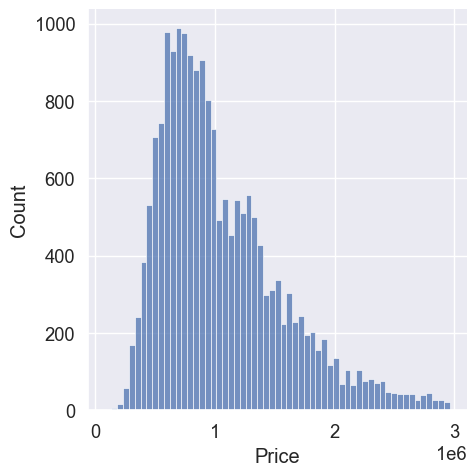

In [ ]:
plt.figure(figsize=(16,7))
sns.displot(dataset['Price'],kde = False)

<Figure size 1600x700 with 0 Axes>

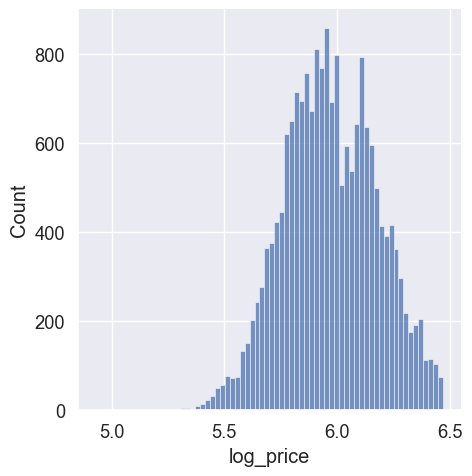

In [ ]:
# Log transform the price variable to achieve a normal distribution 
#x = np.log10(dataset["Price"])
dataset["log_price"] = np.log10(dataset["Price"])
plt.figure(figsize=(16,7))
sns.displot(dataset["log_price"],kde = False)


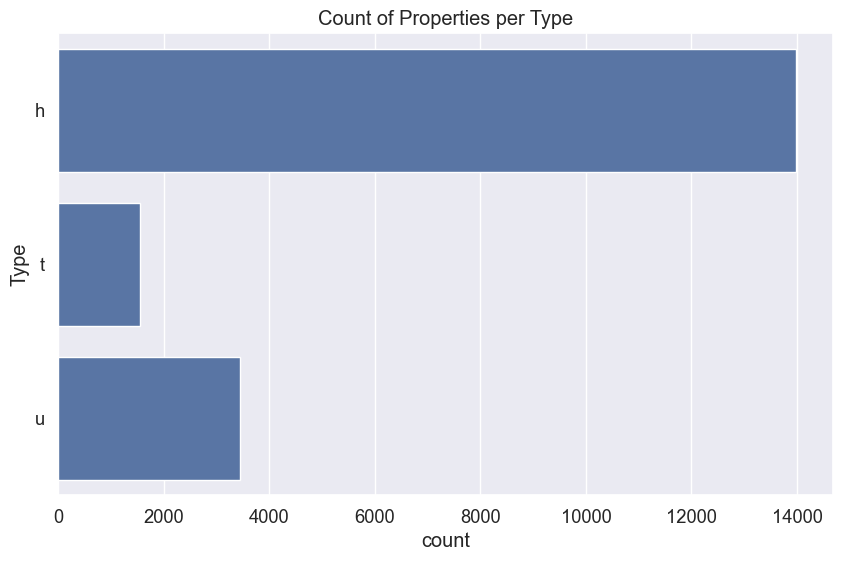

In [ ]:
title = 'Count of properties per Type'
#Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; 
plt.figure(figsize=(10, 6))
title = 'Count of Properties per Type'

sns.countplot(y=dataset['Type'])
plt.title(title)

plt.show()

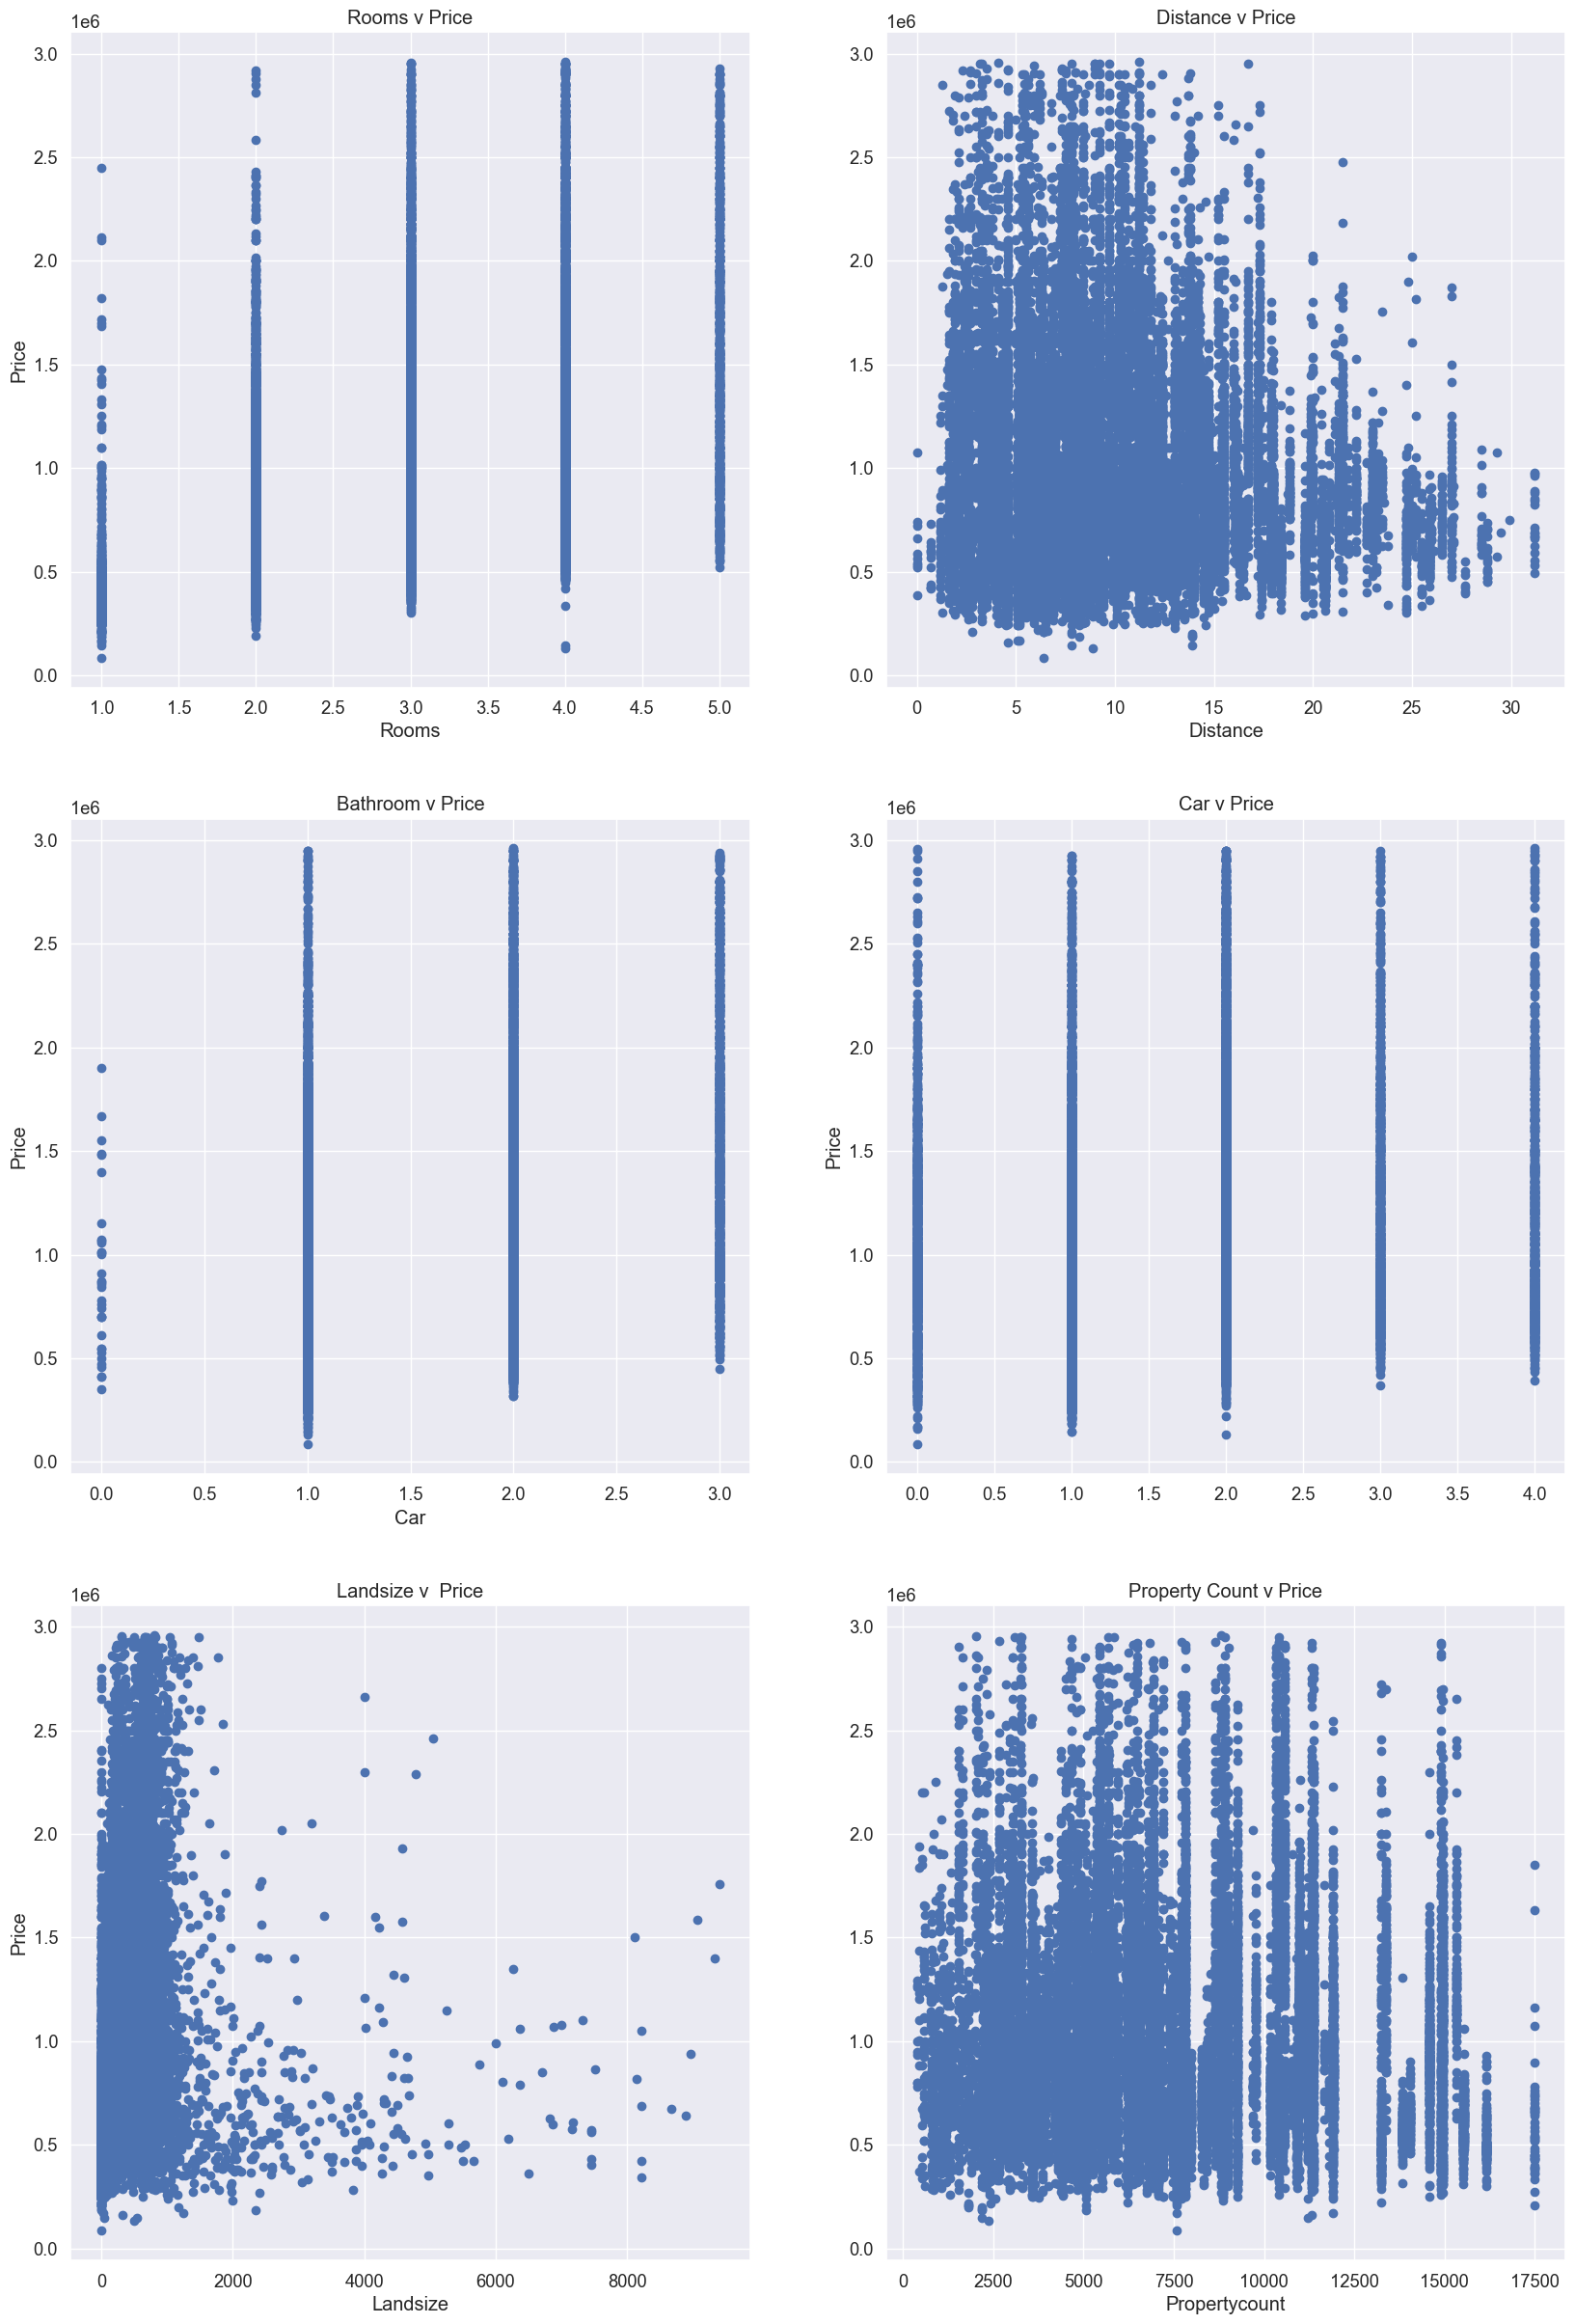

In [ ]:

f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [3,1]
axes[2,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[2,1].set_title('Property Count v Price')

plt.show()

In [ ]:
numeric_columns = dataset.select_dtypes(['float64','int64'])

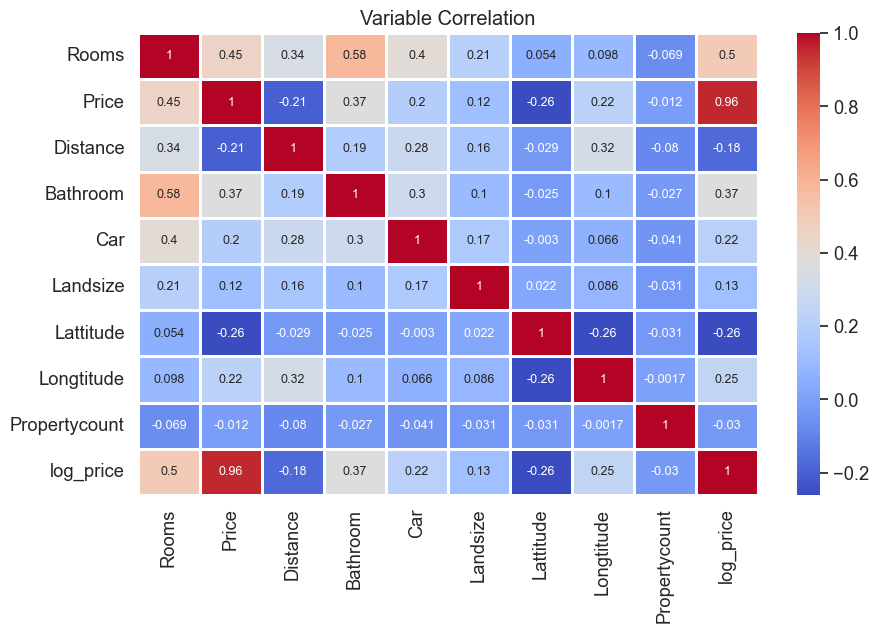

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

Transforming the data so we can have leading 0 for date, so we can transform a quarter column to graph time data against prices

In [142]:
dataset['Date'] = dataset["Date"].str.zfill(10)
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d/%m/%Y')
dataset['quarter']=dataset['Date'].dt.to_period('Q').astype(str)

In [175]:
mean_ds = dataset.groupby('Date')["Price"].mean().reset_index()
mean_ds

,Date,Price
0,2016-01-28,1.009000e+06
1,2016-02-04,9.008214e+05
2,2016-04-16,1.050681e+06
3,2016-04-23,9.202922e+05
4,2016-05-07,1.073004e+06
...,...,...
73,2018-02-17,9.722987e+05
74,2018-02-24,1.100576e+06
75,2018-03-03,1.103170e+06
76,2018-03-10,7.951120e+05


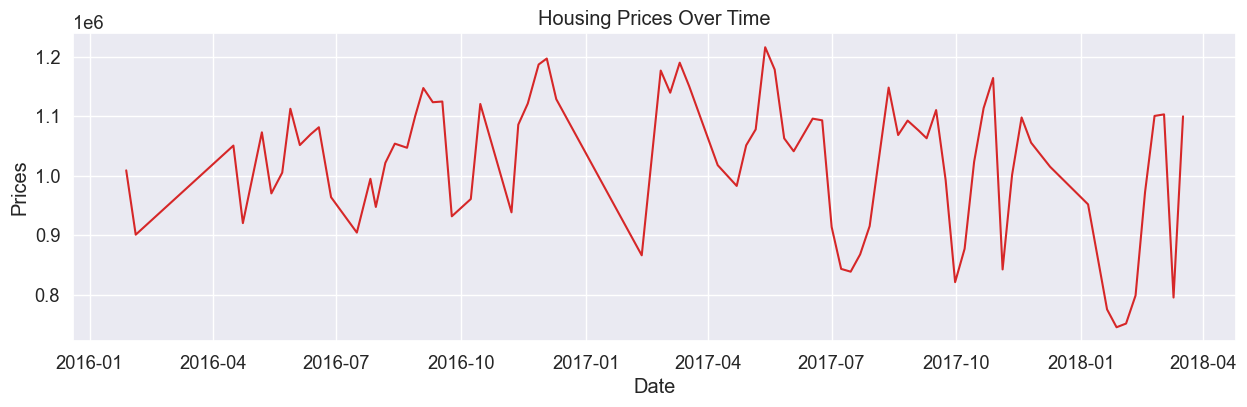

In [176]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Prices', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(mean_ds, x=mean_ds['Date'], y=mean_ds['Price'], title='Housing Prices Over Time')

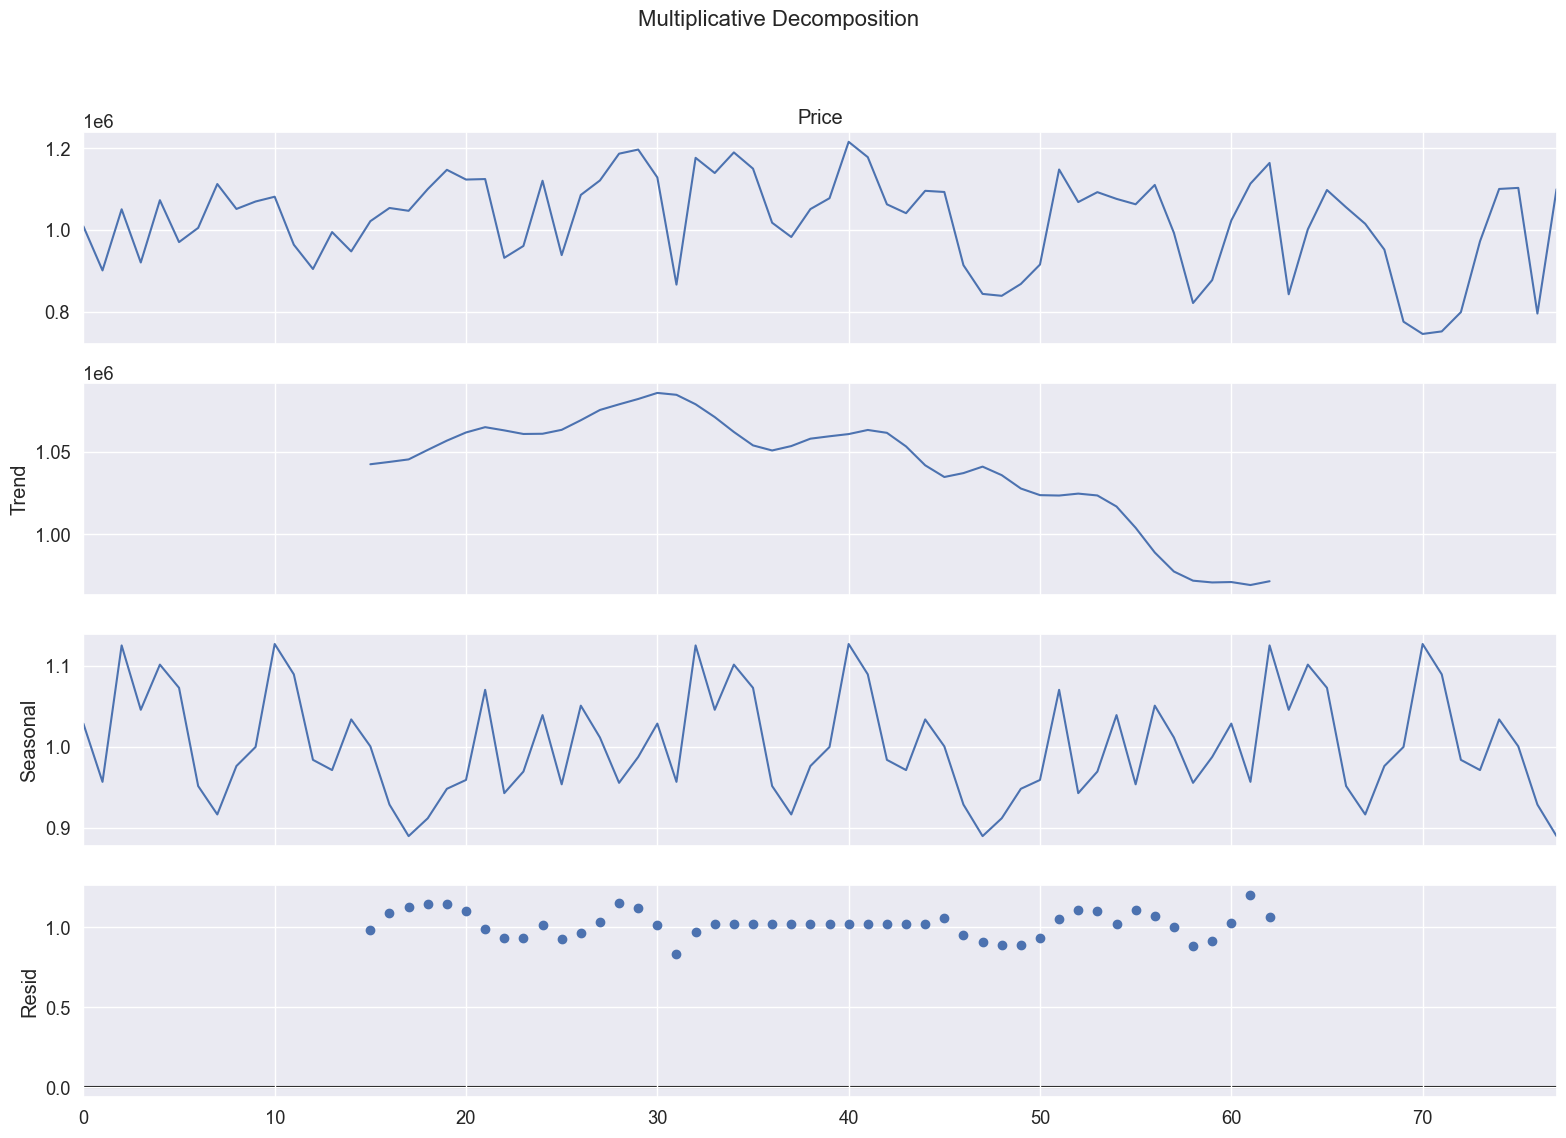

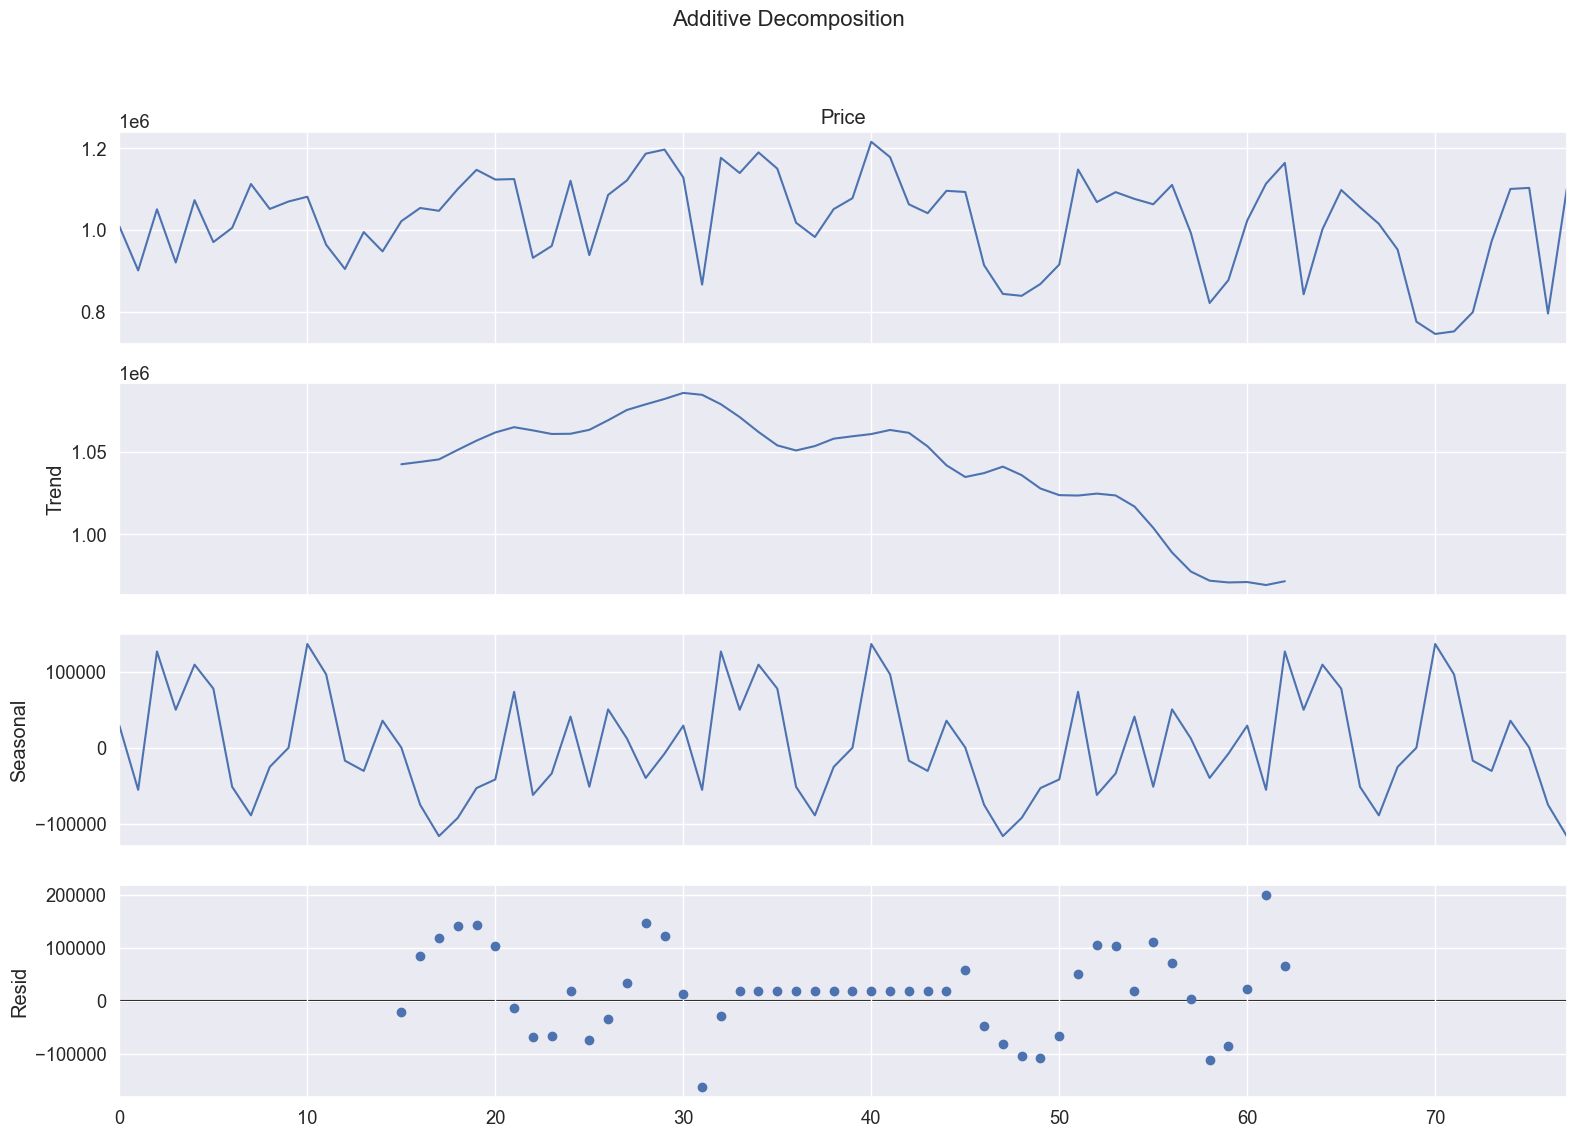

In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(mean_ds['Price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(mean_ds['Price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


From the result of visualization, we can identify most of the data as relatively stationary. Therefore, we will make the assumption that the data that we are trying to perform time series on is stationary data. Some early identification for why time series might yield a less than ideal result:

Sparse Data:
Aggregating prices may mask significant variations and trends present in different suburbs. Sparse data can lead to misleading averages and obscure true market dynamics. However, we do not have enough data for us to identify trends / seasonality within one suburb so therefore it will be difficult for us to estimate using the result and time.
Market Dynamics:
The housing market is influenced by numerous factors including interest rates, economic conditions, government policies, and demographic shifts, which may not be captured in the average price.

Due to sparse data, we will average the housing prices and disregard the suburb factor. Using Auto_Arima, we are able to minimize calculation of different arima factors and identify the model with the best AIC for us to build an ARIMA model on. Seasonality doesnt seem to be a factor after visualization of decomposition.

In [251]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train_size = int(0.85 * len(mean_ds))
train = mean_ds["Price"][:train_size]
test = mean_ds["Price"][train_size:]

In [257]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(mean_ds.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2047.070, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2382.960, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2332.159, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2038.406, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2040.321, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2039.452, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2039.198, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2054.374, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2030.371, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2028.376, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2029.658, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2026.4

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   66
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -848.917
Date:                Fri, 25 Oct 2024   AIC                           1703.834
Time:                        22:48:44   BIC                           1710.403
Sample:                             0   HQIC                          1706.430
                                 - 66                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.039e+06   1.87e+04     55.414      0.000       1e+06    1.08e+06
ar.L1          0.3800      0.108      3.515      0.000       0.168       0.592
sigma2      8.803e+09      0.078   1.14e+11      0.0

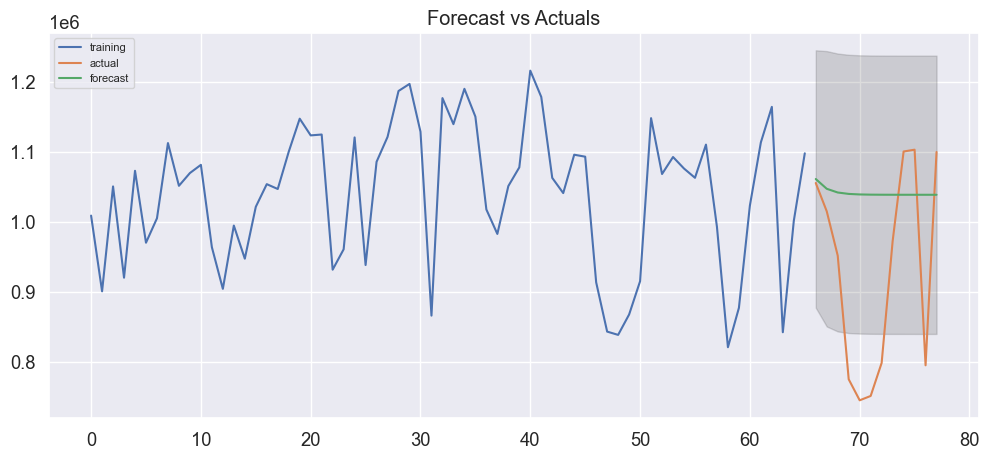

In [262]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 0, 0))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
# fc, se, conf = fitted.forecast(119, alpha=0.05)  # 95% conf
fc = fitted.get_forecast(119)
fchat = fc.predicted_mean
conf = fc.conf_int(alpha=0.05)

# Make as pandas series
fc_series = pd.Series(fchat, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()